<a href="https://colab.research.google.com/github/Kila1515/ML/blob/master/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


コメント追加

In [ ]:
!ls

correct.txt  incorrect.txt  model.png	       __pycache__	Trial.ipynb
datasets     model	    prepare_images.py  target_datasets	visualize.py


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
%run prepare_images.py datasets/mydata

Copied images from datasets/mydata/1yenA
Copied images from datasets/mydata/1yenB
Copied images from datasets/mydata/5yenA
Copied images from datasets/mydata/5yenB
Copied images from datasets/mydata/10yenA
Copied images from datasets/mydata/10yenB
Copied images from datasets/mydata/50yenA
Copied images from datasets/mydata/50yenB
Copied images from datasets/mydata/100yenA
Copied images from datasets/mydata/100yenB


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.8.2
class number=10
['100yenA', '100yenB', '10yenA', '10yenB', '1yenA', '1yenB', '50yenA', '50yenB', '5yenA', '5yenB']


Found 415 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
## Train Data Sample ##


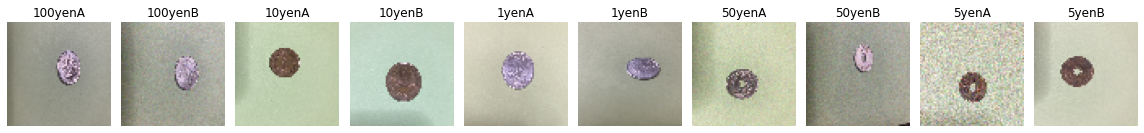

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 activation_8 (Activation)   (None, 64, 64, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 8)         584       
                                                                 
 activation_9 (Activation)   (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7688)              0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/48
35/35 [==============================] - 15s 424ms/step - loss: 2.6406 - accuracy: 0.0916 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/48
35/35 [==============================] - 15s 416ms/step - loss: 2.3104 - accuracy: 0.1133 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 3/48
35/35 [==============================] - 14s 412ms/step - loss: 2.3112 - accuracy: 0.1060 - val_loss: 2.2935 - val_accuracy: 0.1000
Epoch 4/48
35/35 [==============================] - 14s 408ms/step - loss: 2.2781 - accuracy: 0.1735 - val_loss: 2.2523 - val_accuracy: 0.1500
Epoch 5/48
35/35 [==============================] - 14s 409ms/step - loss: 2.1633 - accuracy: 0.2530 - val_loss: 2.1105 - val_accuracy: 0.4500
Epoch 6/48
35/35 [==============================] - 15s 415ms/step - loss: 1.9111 - accuracy: 0.3229 - val_loss: 1.8376 - val_accuracy: 0.5500
Epoch 7/48
35/35 [==============================] - 14s 410ms/step - loss: 1.6483 - accuracy: 0.4554 - val_loss: 1.6795 - val_accuracy: 0.5000

In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 48
# バッチサイズ
BATCH_SIZE = 12

IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.011 0.    0.    0.    0.    0.008 0.979 0.    0.001 0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.999 0.    0.    0.    0.    0.    0.    0.001]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.001 0.01  0.    0.    0.088 0.488 0.001 0.41  0.001 0.001]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.519 0.126 0.001 0.    0.099 0.155 0.015 0.015 0.    0.07 ]
 [0.    0.    0.    0.    0.    0.    0

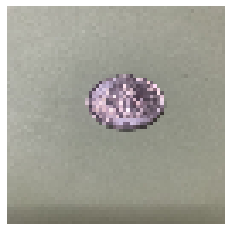

#2 Expected:100yenB -> Predicted:100yenB
File: 100yenB/S__111009816.jpg
Each Prediction Value: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#3 Expected:100yenB -> Predicted:100yenB
File: 100yenB/S__111108152.jpg
Each Prediction Value: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#4 Expected:10yenA -> Predicted:10yenA
File: 10yenA/S__111108115.jpg
Each Prediction Value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
* Correct *
#5 Expected:10yenA -> Predicted:10yenA
File: 10yenA/S__111108116.jpg
Each Prediction Value: [0.    0.    0.999 0.    0.    0.    0.    0.    0.    0.001]
* Correct *
#6 Expected:10yenB -> Predicted:10yenA
File: 10yenB/S__111108140.jpg
Each Prediction Value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
**** INCORRECT ****


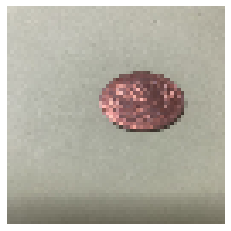

#7 Expected:10yenB -> Predicted:10yenB
File: 10yenB/S__111108141.jpg
Each Prediction Value: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
* Correct *
#8 Expected:1yenA -> Predicted:1yenA
File: 1yenA/S__111009796.jpg
Each Prediction Value: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#9 Expected:1yenA -> Predicted:1yenA
File: 1yenA/S__111108104.jpg
Each Prediction Value: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
* Correct *
#10 Expected:1yenB -> Predicted:1yenB
File: 1yenB/S__111009798.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
* Correct *
#11 Expected:1yenB -> Predicted:1yenB
File: 1yenB/S__111108131.jpg
Each Prediction Value: [0.001 0.01  0.    0.    0.088 0.488 0.001 0.41  0.001 0.001]
* Correct *
#12 Expected:50yenA -> Predicted:50yenA
File: 50yenA/S__111108118.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
* Correct *
#13 Expected:50yenA -> Predicted:50yenA
File: 50yenA/S__111108122.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
* Correct *
#14 Expected:50yenB -> Pre

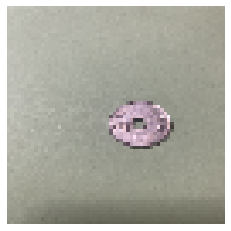

#15 Expected:50yenB -> Predicted:50yenB
File: 50yenB/S__111108150.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
* Correct *
#16 Expected:5yenA -> Predicted:5yenA
File: 5yenA/S__111009802.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
* Correct *
#17 Expected:5yenA -> Predicted:5yenB
File: 5yenA/S__111108109.jpg
Each Prediction Value: [0.007 0.003 0.104 0.    0.001 0.133 0.099 0.014 0.234 0.405]
**** INCORRECT ****


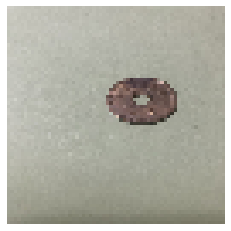

#18 Expected:5yenB -> Predicted:5yenB
File: 5yenB/S__111009803.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
* Correct *
#19 Expected:5yenB -> Predicted:5yenB
File: 5yenB/S__111108138.jpg
Each Prediction Value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
* Correct *
Loss


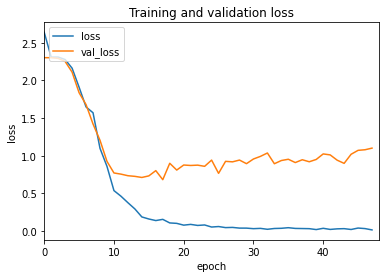

Accuracy


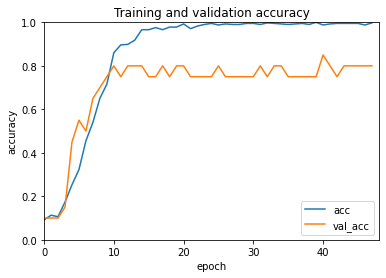

Confusion Matrix


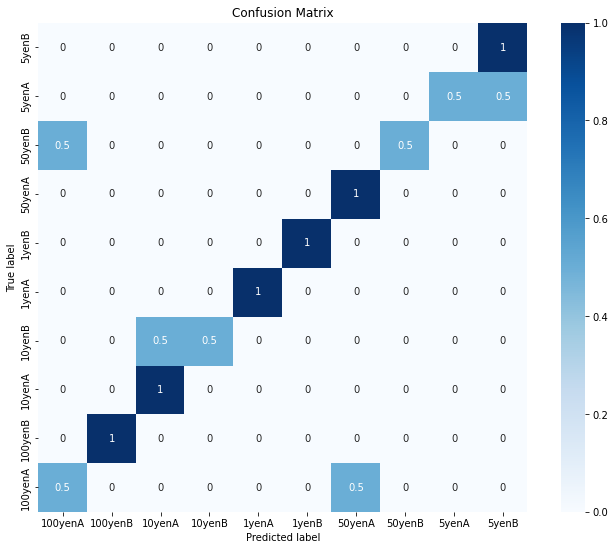

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d_4


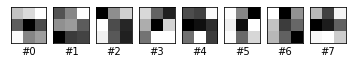

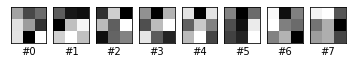

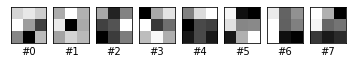

Visualize filter: conv2d_5


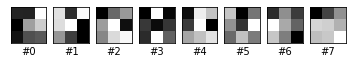

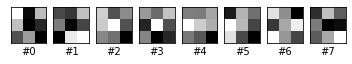

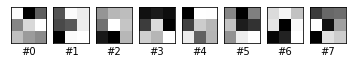

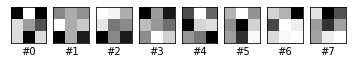

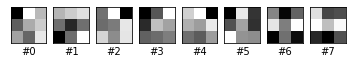

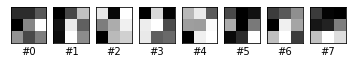

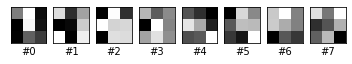

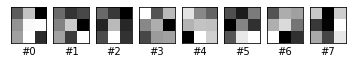

In [ ]:
visualize.vis_filter(model, 'conv2d_4')
visualize.vis_filter(model, 'conv2d_5')

In [ ]:
!cat incorrect.txt

target_datasets/val/100yenA/S__111108128.jpg
target_datasets/val/10yenB/S__111108140.jpg
target_datasets/val/50yenB/S__111108148.jpg
target_datasets/val/5yenA/S__111108109.jpg


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 activation_8 (Activation)   (None, 64, 64, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 8)         584       
                                                                 
 activation_9 (Activation)   (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7688)              0         
                                                      

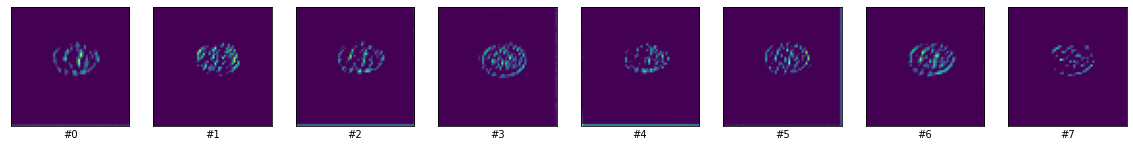

target_datasets/val/10yenB/S__111108140.jpg


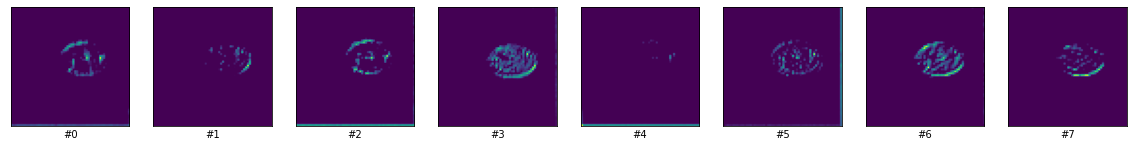

target_datasets/val/50yenB/S__111108148.jpg


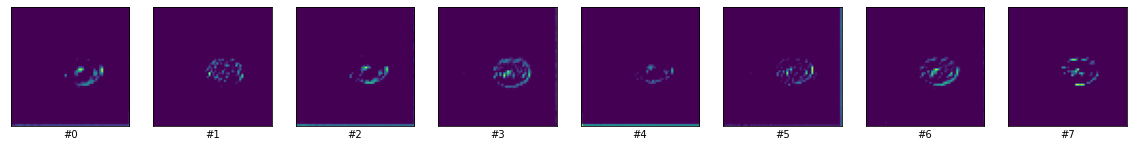

target_datasets/val/5yenA/S__111108109.jpg


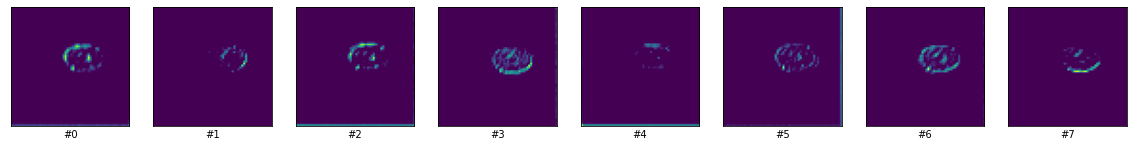

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_9', IMAGE_SIZE)